In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_csv('Automobile_data.csv')

# Câu 1. Đọc dữ liệu. Hiểu các thông tin chung về dữ liệu.

In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Câu 2. Cho biết có bao nhiêu giá trọ trong cột price là chuỗi số, bao nhiêu giá trị không phải là chuỗi số. Cho biết vị trí các dòng chứ 'price' không phải là chuỗi số

In [8]:
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [9]:
df['price'].loc[df['price'].str.isnumeric()==False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

# Câu 3. Thay thế các dòng chứa 'price' là chuỗi số, bao nhiêu giá trọ không là chuỗi số = giá trị median của price. Đổi cột price sang kiểu số

In [10]:
median_price = df['price'].loc[df['price'].str.isnumeric() == True].astype(float).median()

In [11]:
median_price

10295.0

In [12]:
df['price'] = df['price'].replace('?', median_price).astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Câu 4. Thực hiện tương 2. và 3 cho cột horsepower and normalized-losses

In [14]:
# Horsepower
df['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [15]:
df['horsepower'].loc[df['horsepower'].str.isnumeric()==False]

130    ?
131    ?
Name: horsepower, dtype: object

In [16]:
median_horsepower = df['horsepower'].loc[df['horsepower'].str.isnumeric()==True].median()

In [17]:
median_horsepower

95.0

In [18]:
df['horsepower'] = df['horsepower'].replace('?', median_horsepower)

In [19]:
df['horsepower'] = df['horsepower'].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [21]:
# Normalized-losses
df['normalized-losses'].str.isnumeric().value_counts()

True     164
False     41
Name: normalized-losses, dtype: int64

In [22]:
df['normalized-losses'].loc[df['normalized-losses'].str.isnumeric()==False]

0      ?
1      ?
2      ?
5      ?
7      ?
9      ?
14     ?
15     ?
16     ?
17     ?
43     ?
44     ?
45     ?
46     ?
48     ?
49     ?
63     ?
66     ?
71     ?
73     ?
74     ?
75     ?
82     ?
83     ?
84     ?
109    ?
110    ?
113    ?
114    ?
124    ?
126    ?
127    ?
128    ?
129    ?
130    ?
131    ?
181    ?
189    ?
191    ?
192    ?
193    ?
Name: normalized-losses, dtype: object

In [23]:
median_normalized = df['normalized-losses'].loc[df['normalized-losses'].str.isnumeric()==True].median()

In [24]:
median_normalized

115.0

In [25]:
df['normalized-losses'] = df['normalized-losses'].replace('?', median_normalized).astype(float)

# 5. Tìm hiểu xu hướng trung tâm các cột height and price

In [26]:
df['height'].median(), df['price'].median()

(54.1, 10295.0)

In [27]:
df['height'].mean(), df['price'].mean()

(53.724878048780525, 13150.307317073171)

# 6. Trực quan hóa phân phối của các cột  height and price. Nhận xét

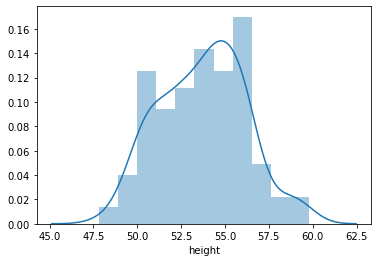

In [28]:
sns.distplot(df['height'])

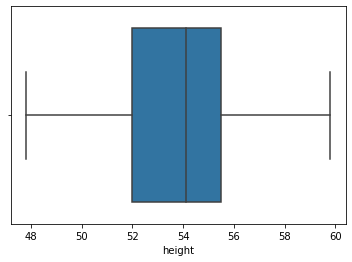

In [36]:
sns.boxplot(df['height'])

In [29]:
skew(df['height'])

0.06265991683394276

Dữ liệu gần giống với phân phối chuẩn có mean gần bằng median

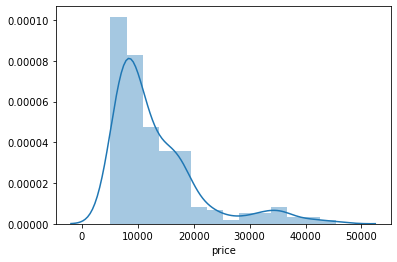

In [30]:
sns.distplot(df['price'])

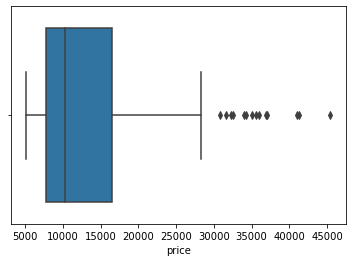

In [35]:
sns.boxplot(df['price'])

In [31]:
skew(df['price'])

1.8274812554683892

dữ liệu lệch phải

# 7. Trực quan hóa dữ liệu giữa horsepower and price

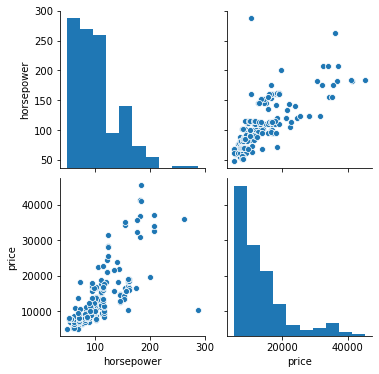

In [32]:
sns.pairplot(df[['horsepower','price']])

Corrleation function:
-1 -> 1 <br>
-1: Tương quan tuyến tính âm hoàn hảo<br>
+1: Tương quan tuyến tính dương hoàn hảo<br>
0: không tương quan<br>
-0.3 < corrr < 0.3 Yếu<br>
0.3 > 0.6 Vừa <br>
\> 0.6 Mạnh

In [33]:
df['horsepower'].corr(df['price'])

0.7499191229023537

In [37]:
df[["horsepower", "price"]].corr()

,horsepower,price
horsepower,1.000000,0.749919
price,0.749919,1.000000


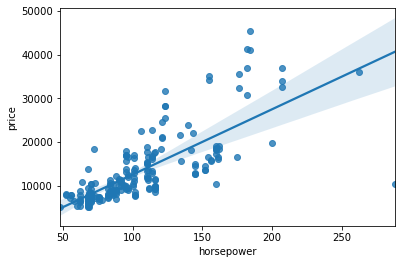

In [34]:
sns.regplot(data=df,x='horsepower',y='price')